In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('C:/Users/Karthik/Downloads/data.csv')

In [3]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [4]:
# Observing the Dtypes and Missing Values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [5]:
# Checking the shape of the dataframe

df.shape

(2227, 3)

In [6]:
np.round(df.describe())

,x1,x2,y
count,2222.0,2224.0,2227.0
mean,-5.0,89476.0,0.0
std,75.0,2983323.0,0.0
min,-134.0,-135.0,0.0
25%,-72.0,-80.0,0.0
50%,-10.0,-1.0,0.0
75%,60.0,64.0,1.0
max,135.0,99999999.0,1.0


### Cleaning the Data

In [7]:
# Dealing with missing Values

df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2219 non-null   float64
 1   x2      2219 non-null   float64
 2   y       2219 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 69.3 KB


In [10]:
df['y']

0       1
1       1
2       1
3       1
4       1
       ..
2222    0
2223    0
2224    0
2225    0
2226    0
Name: y, Length: 2219, dtype: int64

### Exploratory Data Analysis

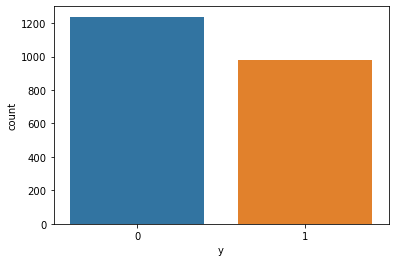

In [11]:
sns.countplot(x = 'y', data = df)
plt.show()

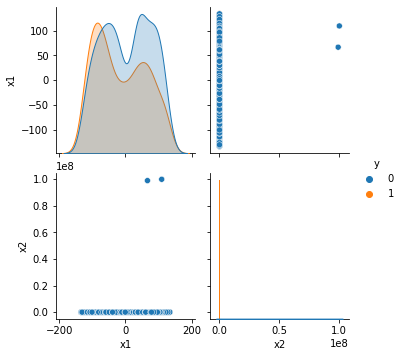

In [12]:
sns.pairplot(df, hue ='y')

<AxesSubplot:>

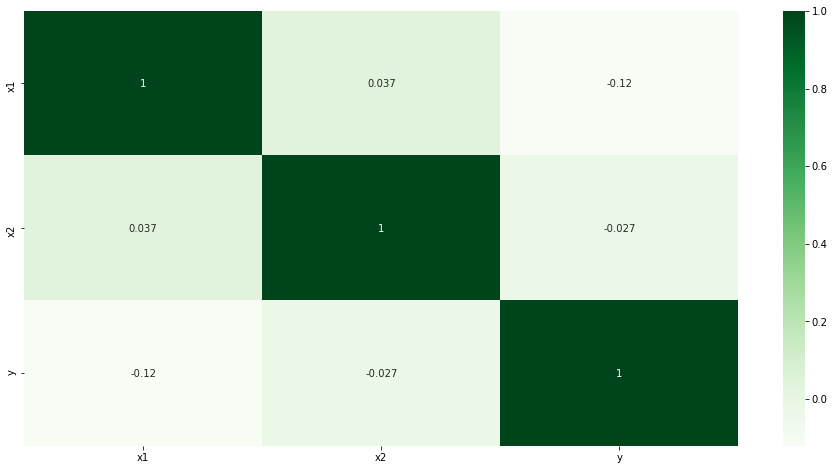

In [13]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(), annot=True, cmap = 'Greens')

C:\Users\Karthik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x1', ylabel='Density'>

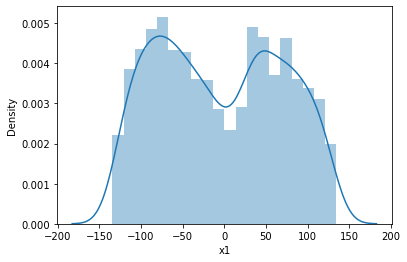

In [14]:
sns.distplot(df['x1'],bins = 20)

C:\Users\Karthik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x2', ylabel='Density'>

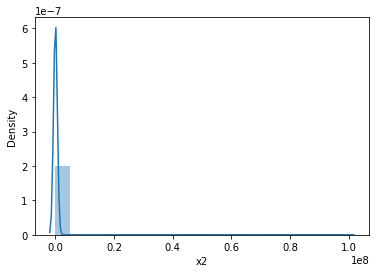

In [15]:
sns.distplot(df['x2'],bins = 20)

C:\Users\Karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x1'>

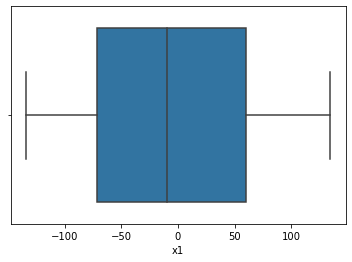

In [16]:
sns.boxplot(df['x1'])

C:\Users\Karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x2'>

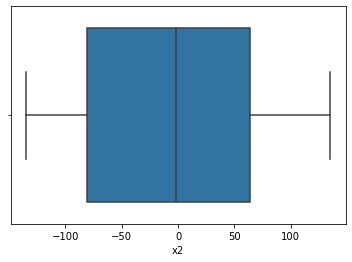

In [20]:
sns.boxplot(df['x2'])

### Dealing with Outliers

In [18]:
# Checking for outliers in x2


q3,q1 = np.percentile(df.x2,[75,25])
x2_IQR = q3-q1
x2_upper_outliers = q3 + 1.5* x2_IQR
x2_lower_outliers= q3 - 1.5 * x2_IQR
x2_outliers_ind = df[df['x2']>x2_upper_outliers].index
#x2_outliers_ind = df[df['x2']<x2_lower_outliers].index
#df[df['x2']>x2_upper_outliers]
df[df['x2']<x2_lower_outliers]

,x1,x2,y


In [19]:
df.drop(index=x2_outliers_ind,axis=0,inplace=True)
df

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1
...,...,...,...
2221,88.129639,107.514918,0
2222,98.714112,89.643117,0
2223,96.633331,91.000000,0
2224,85.673940,103.839270,0


C:\Users\Karthik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x2', ylabel='Density'>

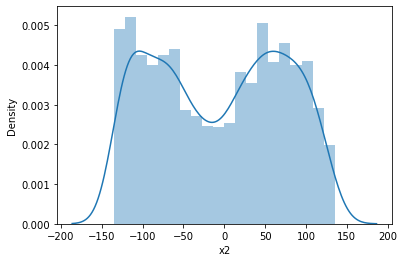

In [21]:
sns.distplot(df['x2'],bins = 20)

### Logistic Regression

In [32]:
# Checking for VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [65]:
X = df.drop(['y'], axis =1)
y = df['y']

In [33]:
ss = StandardScaler()

In [34]:
X_ss = ss.fit_transform(df)

In [35]:
X_ss

array([[-1.52884438,  1.52495022,  1.12246997],
       [-1.28507226,  1.30919525,  1.12246997],
       [-1.67453109,  1.4218215 ,  1.12246997],
       ...,
       [ 1.35498614,  1.22429603, -0.89089243],
       [ 1.20866658,  1.38513688, -0.89089243],
       [ 1.11901312,  1.06902531, -0.89089243]])

In [45]:
X_ss_df = pd.DataFrame(X_ss, columns = df.columns)

In [46]:
X_ss_df.head()

,x1,x2,y
0,-1.528844,1.524950,1.12247
1,-1.285072,1.309195,1.12247
2,-1.674531,1.421821,1.12247
3,-1.466585,1.352017,1.12247
4,-1.528844,1.524950,1.12247


In [49]:
np.round(X_ss_df.describe(),2)

,x1,x2,y
count,2217.00,2217.00,2217.00
mean,0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-1.73,-1.61,-0.89
25%,-0.89,-0.92,-0.89
50%,-0.07,0.06,-0.89
75%,0.86,0.88,1.12
max,1.86,1.77,1.12


In [53]:
vif = pd.DataFrame()

In [54]:
vif['Variables'] = df.columns

In [55]:
vif

,Variables
0,x1
1,x2
2,y


In [57]:
vif['VIF Factor'] = [variance_inflation_factor(X_ss,exog_idx = i) for i in range(3)]

In [58]:
vif

,Variables,VIF Factor
0,x1,1.029025
1,x2,1.018271
2,y,1.020721


In [61]:
#X = X_ss_df.drop(['y'], axis =1)
#y = X_ss_df['y']

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 24)

In [67]:
lr = LogisticRegression()

In [68]:
lr.fit(X_train,y_train)

LogisticRegression()

In [69]:
predictions = lr.predict(X_test)
predictions_train = lr.predict(X_train)

In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, auc,roc_curve
from sklearn.metrics import roc_auc_score

In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.99      0.81       367
           1       0.98      0.43      0.60       299

    accuracy                           0.74       666
   macro avg       0.83      0.71      0.70       666
weighted avg       0.82      0.74      0.71       666



In [74]:
print(accuracy_score(y_test, predictions))

0.7402402402402403


In [75]:
# Confusion Matrix

cm = confusion_matrix(y_test,predictions)

<AxesSubplot:>

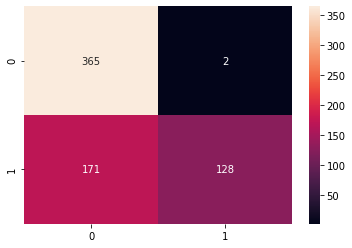

In [77]:
# Confusion Matrix plot

sns.heatmap(cm,annot =True, fmt = 'g')

In [78]:
# Checking for AUC and ROC

FPR, TPR,_ = roc_curve(y_train,predictions_train)
FPR1, TPR1,_ = roc_curve(y_test,predictions)

In [79]:
auc_train = auc(FPR,TPR)
print('Train AUC:%0.3f' % auc_train)

auc_test = auc(FPR1,TPR1)
print('Test AUC:%0.3f' % auc_test)

Train AUC:0.712
Test AUC:0.711


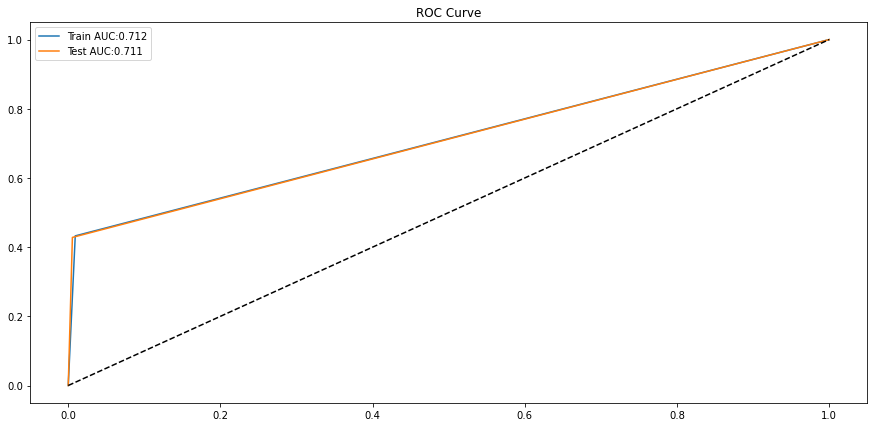

In [80]:
# Plot for ROC Curve

plt.figure(figsize = (15,7))
plt.plot(FPR,TPR, label = 'Train AUC:%0.3f' % auc_train)
plt.plot(FPR1,TPR1, label = 'Test AUC:%0.3f' % auc_test)

plt.plot([0,1],[0,1], ls='--', color ='black')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Calculating Accuracy, Precision, Recall, Specificity

In [81]:
true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]

In [82]:
Accuracy = (true_positive + true_negative) /(true_positive + false_positive + false_negative + true_negative)
Accuracy

0.7402402402402403

In [83]:
Precision = true_positive / (true_positive + false_positive)
Precision

0.9945504087193461

In [84]:
Recall = true_positive / (true_positive + false_negative)
Recall

0.6809701492537313

In [85]:
Specificity = true_negative / (true_negative + false_positive)
Specificity

0.9846153846153847

In [86]:
auc = roc_auc_score(y_test,predictions)
auc

0.711322027102148

### Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [89]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [90]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= -66.01
|   |--- feature_1 <= -26.91
|   |   |--- class: 0
|   |--- feature_1 >  -26.91
|   |   |--- class: 1
|--- feature_0 >  -66.01
|   |--- feature_1 <= 16.17
|   |   |--- feature_0 <= -6.27
|   |   |   |--- feature_1 <= -20.99
|   |   |   |   |--- feature_0 <= -9.84
|   |   |   |   |   |--- feature_1 <= -34.22
|   |   |   |   |   |   |--- feature_0 <= -13.77
|   |   |   |   |   |   |   |--- feature_0 <= -21.07
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  -21.07
|   |   |   |   |   |   |   |   |--- feature_0 <= -20.99
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_0 >  -20.99
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  -13.77
|   |   |   |   |   |   |   |--- feature_0 <= -13.18
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_0 >  -13.18
|   |   |   |   |   |   |   |   |--- class: 0
|   

In [91]:
clf.score(X_train,y_train)

1.0

In [92]:
clf.score(X_test,y_test)

0.9309309309309309

### Hyperparameter Tuning using GridSearch

In [97]:
grid_param = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(2,17,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split' : range(2,10,1),
    'splitter':['best','random']
}

In [98]:
grid_search = GridSearchCV(estimator = clf, param_grid = grid_param, cv=5)

In [100]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 17),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [101]:
best_params = grid_search.best_params_
print(best_params)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 6, 'splitter': 'best'}


In [102]:
grid_search.best_score_

0.9529301939632818

In [103]:
clf = DecisionTreeClassifier(criterion = 'entropy',max_depth = 10, min_samples_leaf = 6, min_samples_split = 6, 
                             splitter= 'best')

In [104]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=6)

In [105]:
clf.score(X_test,y_test)

0.93993993993994

In [107]:
y_test_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test,y_test_pred)
accuracy

0.93993993993994

In [108]:
confusion_mat = confusion_matrix (y_test,y_test_pred)
confusion_mat    

array([[342,  25],
       [ 15, 284]], dtype=int64)

In [109]:
report = classification_report(y_test,y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       367
           1       0.92      0.95      0.93       299

    accuracy                           0.94       666
   macro avg       0.94      0.94      0.94       666
weighted avg       0.94      0.94      0.94       666



### kNN-Classifier

In [110]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
X_train.shape

(1551, 2)

In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [116]:
y_pred = classifier.predict(X_test)

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       367
           1       0.95      0.94      0.94       299

    accuracy                           0.95       666
   macro avg       0.95      0.95      0.95       666
weighted avg       0.95      0.95      0.95       666



In [119]:
print(confusion_matrix(y_test,y_pred))

[[351  16]
 [ 18 281]]
